In [4]:
import pandas as pd
# Some sklearn tools for preprocessing and building a pipeline. 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

#reading dataset
ds=pd.read_csv('bank-full.csv')


In [2]:
#separting data,data cleaning
y = ds['y']
X = ds.drop(['y','duration'], axis = 1)
X = pd.get_dummies(X) #one hot encode 
print(X.shape)
print(y.shape) #Shape matching in rows! 


(45211, 50)
(45211,)


In [3]:
#splitting into training and testing data
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.3,random_state=42)


In [5]:
print('Shape of Training set : ' , [X_train.shape,y_train.shape])
print('Shape of Validation set : ' , [X_valid.shape,y_valid.shape])

Shape of Training set :  [(31647, 50), (31647,)]
Shape of Validation set :  [(13564, 50), (13564,)]


In [7]:
#preprocessing data
from sklearn import preprocessing
X_train=preprocessing.scale(X_train)
X_test=preprocessing.scale(X_valid)
X_valid=preprocessing.scale(X_valid)


In [8]:
#knn
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors = 5) #Create model

clf.fit(X_train,y_train) #Fit model 

y_pred = clf.predict(X_valid) #Predict on test dataset 
y_pred
print('Accuracy:',round(metrics.accuracy_score(y_valid,y_pred),3)) 


Accuracy: 0.887


In [10]:
#logistic
log_clf = LogisticRegression().fit(X_train,y_train)

log_pred = log_clf.predict(X_valid)
log_pred
print('Accuracy:',round(metrics.accuracy_score(y_valid,log_pred),3)) 


Accuracy: 0.892


In [11]:
#svm
from sklearn import svm 

#Create classifier model 
clf = svm.SVC(kernel = 'linear')

#Train Model 
clf.fit(X_train, y_train)
       
#Predict 
y_pred = clf.predict(X_valid)
from sklearn import metrics 

print('Accuracy:',round(metrics.accuracy_score(y_valid,y_pred),2)) 

Accuracy: 0.89


In [12]:
#randomforest
from sklearn.ensemble import RandomForestClassifier 
model = RandomForestClassifier(n_estimators = 50)
model.fit(X_train, y_train)
preds = model.predict(X_valid)
print('Accuracy:',round(metrics.accuracy_score(y_valid,preds),2)) 


Accuracy: 0.89


In [13]:
#decision trees
clf=DecisionTreeClassifier()
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print('Accuracy:',round(metrics.accuracy_score(y_valid,y_pred),2)) 

Accuracy: 0.82


Text(0.5, 0, 'Marital Status')

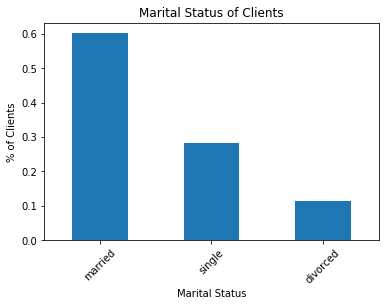

In [14]:
import matplotlib.pyplot as plt
ds['marital'].value_counts(normalize = True).plot(kind = 'bar') #Plot percentage distribution of marital status
plt.xticks(rotation = 45)
plt.title('Marital Status of Clients')
plt.ylabel('% of Clients')
plt.xlabel('Marital Status')


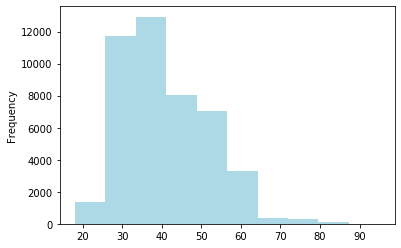

In [15]:
ds['age'].plot(kind = 'hist', color = 'lightblue') #See gender distribution of age 


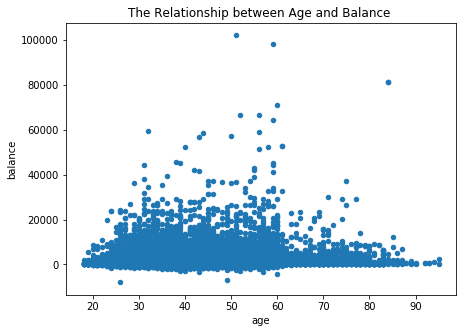

In [16]:
#Visualize the relationship between 'age' and 'balance'¶

scatter_age_balance = ds.plot.scatter('age','balance',figsize = (7,5))

plt.title('The Relationship between Age and Balance ')
plt.show()


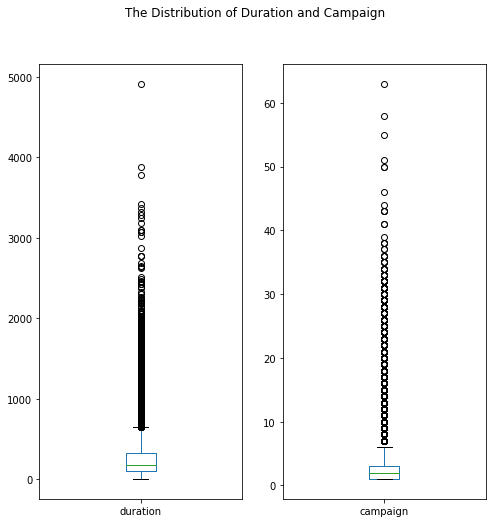

In [17]:
#Visualize the relationship between 'duration' and 'campaign'

dist_dur_cam = ds[['duration','campaign']].plot(kind = 'box', 
                                                      figsize = (8,8),
                                                      subplots = True, layout = (1,2),
                                                      sharex = False, sharey = False,
                                                      title='The Distribution of Duration and Campaign')
plt.show()

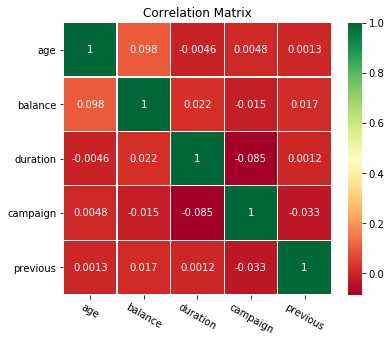

In [18]:
#correlation matrix
import seaborn as sns
corr_data = ds[['age','balance','duration','campaign','month','previous','poutcome']]
corr = corr_data.corr()

cor_plot = sns.heatmap(corr,annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':10})
fig=plt.gcf()
fig.set_size_inches(6,5)
plt.xticks(fontsize=10,rotation=-30)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix')
plt.show()


[[11723   243]
 [ 1213   385]]


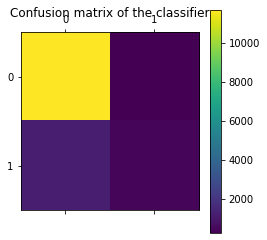

In [19]:
#confusion matrix
from sklearn.metrics import confusion_matrix
import pylab as pl

print(confusion_matrix(y_valid, preds))

cm = confusion_matrix(y_valid, preds)
pl.matshow(cm)
pl.title('Confusion matrix of the classifier')
pl.colorbar()
pl.show()
